# 11: Spotify API Requests
**Author**: Agustín Arturo Melian Su

**Description**: This project recolects data from the artist **Tim McGraw** using Spotify's API and the Spotify 12 M songs dataset (Figueroa, 2020) obtained from Kaggle.

**Goal**: The purpose of this project is not to conduct a full analysis, due to the lack of official data after Spotify discontinued certain endpoints, such as audio features.

In [182]:
# Import libraries
import os
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy import SpotifyClientCredentials
from dotenv import load_dotenv
import json
load_dotenv()

True

## Most streamed songs ds

In [183]:
# Spotify authentication
spotifyClient = os.getenv('SPOTIFY_CLIENT')
spotifySecret = os.getenv('SPOTIFY_SECRET')
auth_manager = SpotifyClientCredentials(client_id=spotifyClient, client_secret=spotifySecret)

sp = spotipy.Spotify(
    auth_manager=auth_manager,
    requests_timeout=10,
    retries=10
)

In [184]:
# Retrieve artist id
artist = 'Tim McGraw'
artist_id = sp.search(q=artist, type='artist')['artists']['items'][0]['id']
artist_id

'6roFdX1y5BYSbp60OTJWMd'

In [185]:
# Get top tracks
tracks_raw = sp.artist_top_tracks(artist_id, country='MX')
tracks_raw = tracks_raw['tracks']
tracks_raw[0].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'is_playable', 'name', 'popularity', 'preview_url', 'track_number', 'type', 'uri'])

In [186]:
tracks_dict = {
    'name': [track['name'] for track in tracks_raw],
    'duration_ms': [track['duration_ms'] for track in tracks_raw],
    'popularity': [track['popularity'] for track in tracks_raw],
    'song_id': [track['id'] for track in tracks_raw],
}

df_popular_raw = pd.DataFrame(tracks_dict)
df_popular_raw

,name,duration_ms,popularity,song_id
0,Something Like That,183733,73,6leiB1fEsTnVCuPiielde5
1,"I Like It, I Love It",205706,71,3IvcWWehbBcBR4YZxlGM9R
2,Wrong Ones (Feat. Tim McGraw),195822,68,2CIXO1jQbrV1hlfI7FUKld
3,Where The Green Grass Grows,201600,68,0nDjzA4kns1QOWPXuOn6Xw
4,Humble And Kind,259266,67,4Pn0JlCUusD2QHjADuOzuV
5,Just To See You Smile,215173,67,2op0kDNARK2VHWHntEeH4g
6,Live Like You Were Dying,300333,67,7B1QliUMZv7gSTUGAfMRRD
7,Highway Don't Care,276880,65,4wFUdSCer8bdQsrp1M90sa
8,Indian Outlaw,182120,64,1fYypIR0kaFzaSRbzvtjl9
9,Shotgun Rider,235386,63,3LbvNFkqDTrE1liGMmZBDL


In [187]:
df_popular_baking = df_popular_raw.copy()

In [188]:
df_popular_baking['name'] = df_popular_baking['name'].astype('string')
df_popular_baking['duration_ms'] = df_popular_baking['duration_ms'].astype('int')
df_popular_baking['popularity'] = df_popular_baking['popularity'].astype('int')
df_popular_baking['song_id'] = df_popular_baking['song_id'].astype('string')

In [189]:
df_popular = df_popular_baking.copy()

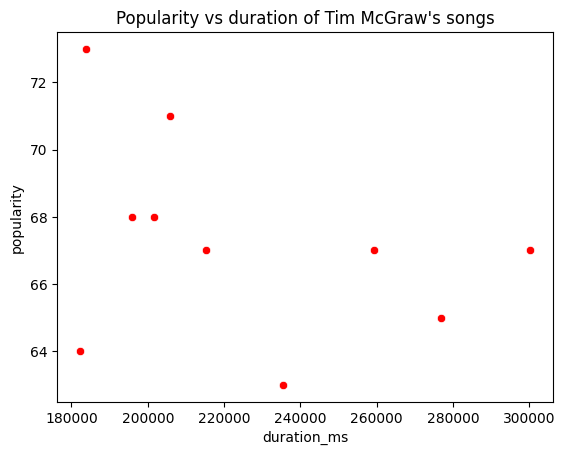

In [190]:
# Visualization
sns.scatterplot(data=df_popular, x='duration_ms', y='popularity', c='r')
plt.title("Popularity vs duration of Tim McGraw's songs")
plt.show()

### Insights on popularity vs duration:
- There is no clear linear relationship. In general, shorter songs include some popular tracks, while longer songs tend to be slightly lower in popularity, but not consistently. 
- The dataset is too small to conclude strongly

## Features data set

In [191]:
import kagglehub

path = kagglehub.dataset_download("rodolfofigueroa/spotify-12m-songs")
file_path = os.path.join(path, 'tracks_features.csv')

In [192]:
df_features_raw = pd.read_csv(file_path, nrows=10000)
df_features_raw.sample(5)

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
234,3jS0Hj7Fgn5PVCARsu2XUu,Got Into My Head & Stole My Heart,Nodesha,4Yjnki7SUpEbmPVzWpgede,['Nodesha'],['0m3R4g8wdmgu5YByHlrmQX'],5,1,False,0.379,...,0.1260,0.28400,0.000008,0.1460,0.287,207.329,259720,4.0,2003,2003
2480,0Ea3ZTvHNNVGXhVi6gZmhM,Milwaukee,Guerrilla Skies EP,5mHlDmaKQfR2YpO2hCHGhV,['Throneberry'],['2pic3sPa1zfWMeWmZMCuYn'],2,1,False,0.277,...,0.0282,0.09660,0.134000,0.0983,0.150,140.331,323373,4.0,1996,1996
3665,29zHIz9RDRFycyxOGOLiMg,Big Top Women,Almeria Club,3git2AMjnbL2m2ZN4n4ikO,"['Hank Williams, Jr.']",['2dyeCWctcFRt3Pha76ONgb'],7,1,False,0.500,...,0.0453,0.01260,0.000348,0.0922,0.652,94.039,190600,4.0,2002,2002-01-08
2568,4VIvdbzicSthVgQ6ybjaWh,Why Go? (feat. Estelle),Forever Faithless - The Greatest Hits,2Vcq2BbEjHFdfodZ8hlcZL,"['Faithless', 'Estelle']","['5T4UKHhr4HGIC0VzdZQtAE', '5T0MSzX9RC5NA6gAI6...",15,1,False,0.725,...,0.0611,0.13300,0.001190,0.1020,0.482,125.976,204320,4.0,2005,2005-08-30
1147,6pMLYRgjml86VGxeuQZKru,No Les Creo Nada,Baile De Máscaras,0mNtqr4ai5szaFHPW0YiOr,['Maldita Vecindad Y Los Hijos Del 5to. Patio'],['6WvDtNFHOWHfiNy8NVHujT'],5,1,False,0.482,...,0.0349,0.00192,0.154000,0.2490,0.970,139.554,191827,4.0,1996,1996-05-10


In [193]:
df_features_baking = df_features_raw.copy()
df_features_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  object 
 1   name              10000 non-null  object 
 2   album             10000 non-null  object 
 3   album_id          10000 non-null  object 
 4   artists           10000 non-null  object 
 5   artist_ids        10000 non-null  object 
 6   track_number      10000 non-null  int64  
 7   disc_number       10000 non-null  int64  
 8   explicit          10000 non-null  bool   
 9   danceability      10000 non-null  float64
 10  energy            10000 non-null  float64
 11  key               10000 non-null  int64  
 12  loudness          10000 non-null  float64
 13  mode              10000 non-null  int64  
 14  speechiness       10000 non-null  float64
 15  acousticness      10000 non-null  float64
 16  instrumentalness  10000 non-null  float64

In [194]:
df_features_baking['id'] = df_features_baking['id'].astype('string')

# desired features = danceability, energy, loudness, 
# speechiness, acousticness, instrumentalness
# 'liveness, valence, tempo

keep = ['id', 'danceability', 'energy', 'loudness', 'speechiness', 
        'acousticness', 'liveness', 'valence',
        'tempo']

df_features_baking = df_features_baking[keep]

In [195]:
df_features = df_features_baking.copy()
df_features.sample(5)

,id,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
3126,6wCxBSuF1s1md4fHAqwbzz,0.417,0.588,-13.609,0.0951,0.125,0.6320,0.543,117.824
7552,6MjasaXLbXWrx8Be9Sg7QX,0.191,0.224,-11.856,0.0316,0.814,0.1260,0.244,78.226
3590,6CliAtLLV1XVcGfNNVeXle,0.544,0.288,-12.623,0.0318,0.662,0.3770,0.282,72.875
8500,5GAN4h2R4OqNDsyhQ1EdXd,0.515,0.308,-18.596,0.0465,0.691,0.0936,0.588,105.177
9611,6tV8NPjIorB6MPp49flQ3H,0.741,0.499,-11.327,0.0335,0.178,0.2750,0.174,120.087


In [196]:
df_merged = pd.merge(df_popular, df_features, 
                  left_on='song_id', 
                  right_on='id', 
                  how='inner')

df_merged = df_merged.drop(columns=['song_id', 'id'])

df_merged

,name,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,Something Like That,183733,73,0.507,0.850,-5.679,0.0472,0.3780,0.0567,0.847,171.800
1,"I Like It, I Love It",205706,71,0.643,0.961,-5.298,0.0315,0.0196,0.9480,0.960,124.027
2,Where The Green Grass Grows,201600,68,0.479,0.698,-7.914,0.0277,0.1980,0.1260,0.673,159.699
3,Just To See You Smile,215173,67,0.492,0.823,-8.526,0.0297,0.1270,0.0523,0.702,94.342
4,Indian Outlaw,182120,64,0.664,0.739,-7.229,0.0415,0.0364,0.2820,0.759,110.101


## Analysis

In [197]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
duration_ms,5.0,197666.40000,14338.929608,182120.0000,183733.0000,201600.0000,205706.0000,215173.0000
popularity,5.0,68.60000,3.507136,64.0000,67.0000,68.0000,71.0000,73.0000
danceability,5.0,0.55700,0.088958,0.4790,0.4920,0.5070,0.6430,0.6640
energy,5.0,0.81420,0.102551,0.6980,0.7390,0.8230,0.8500,0.9610
loudness,5.0,-6.92920,1.399401,-8.5260,-7.9140,-7.2290,-5.6790,-5.2980
speechiness,5.0,0.03552,0.008417,0.0277,0.0297,0.0315,0.0415,0.0472
acousticness,5.0,0.15180,0.145525,0.0196,0.0364,0.1270,0.1980,0.3780
liveness,5.0,0.29300,0.377760,0.0523,0.0567,0.1260,0.2820,0.9480
valence,5.0,0.78820,0.116755,0.6730,0.7020,0.7590,0.8470,0.9600
tempo,5.0,131.99380,32.834944,94.3420,110.1010,124.0270,159.6990,171.8000


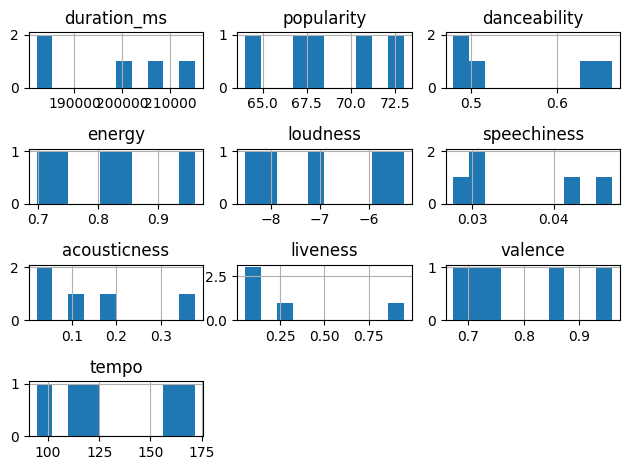

In [198]:
df_merged.hist()
plt.tight_layout()
plt.show()

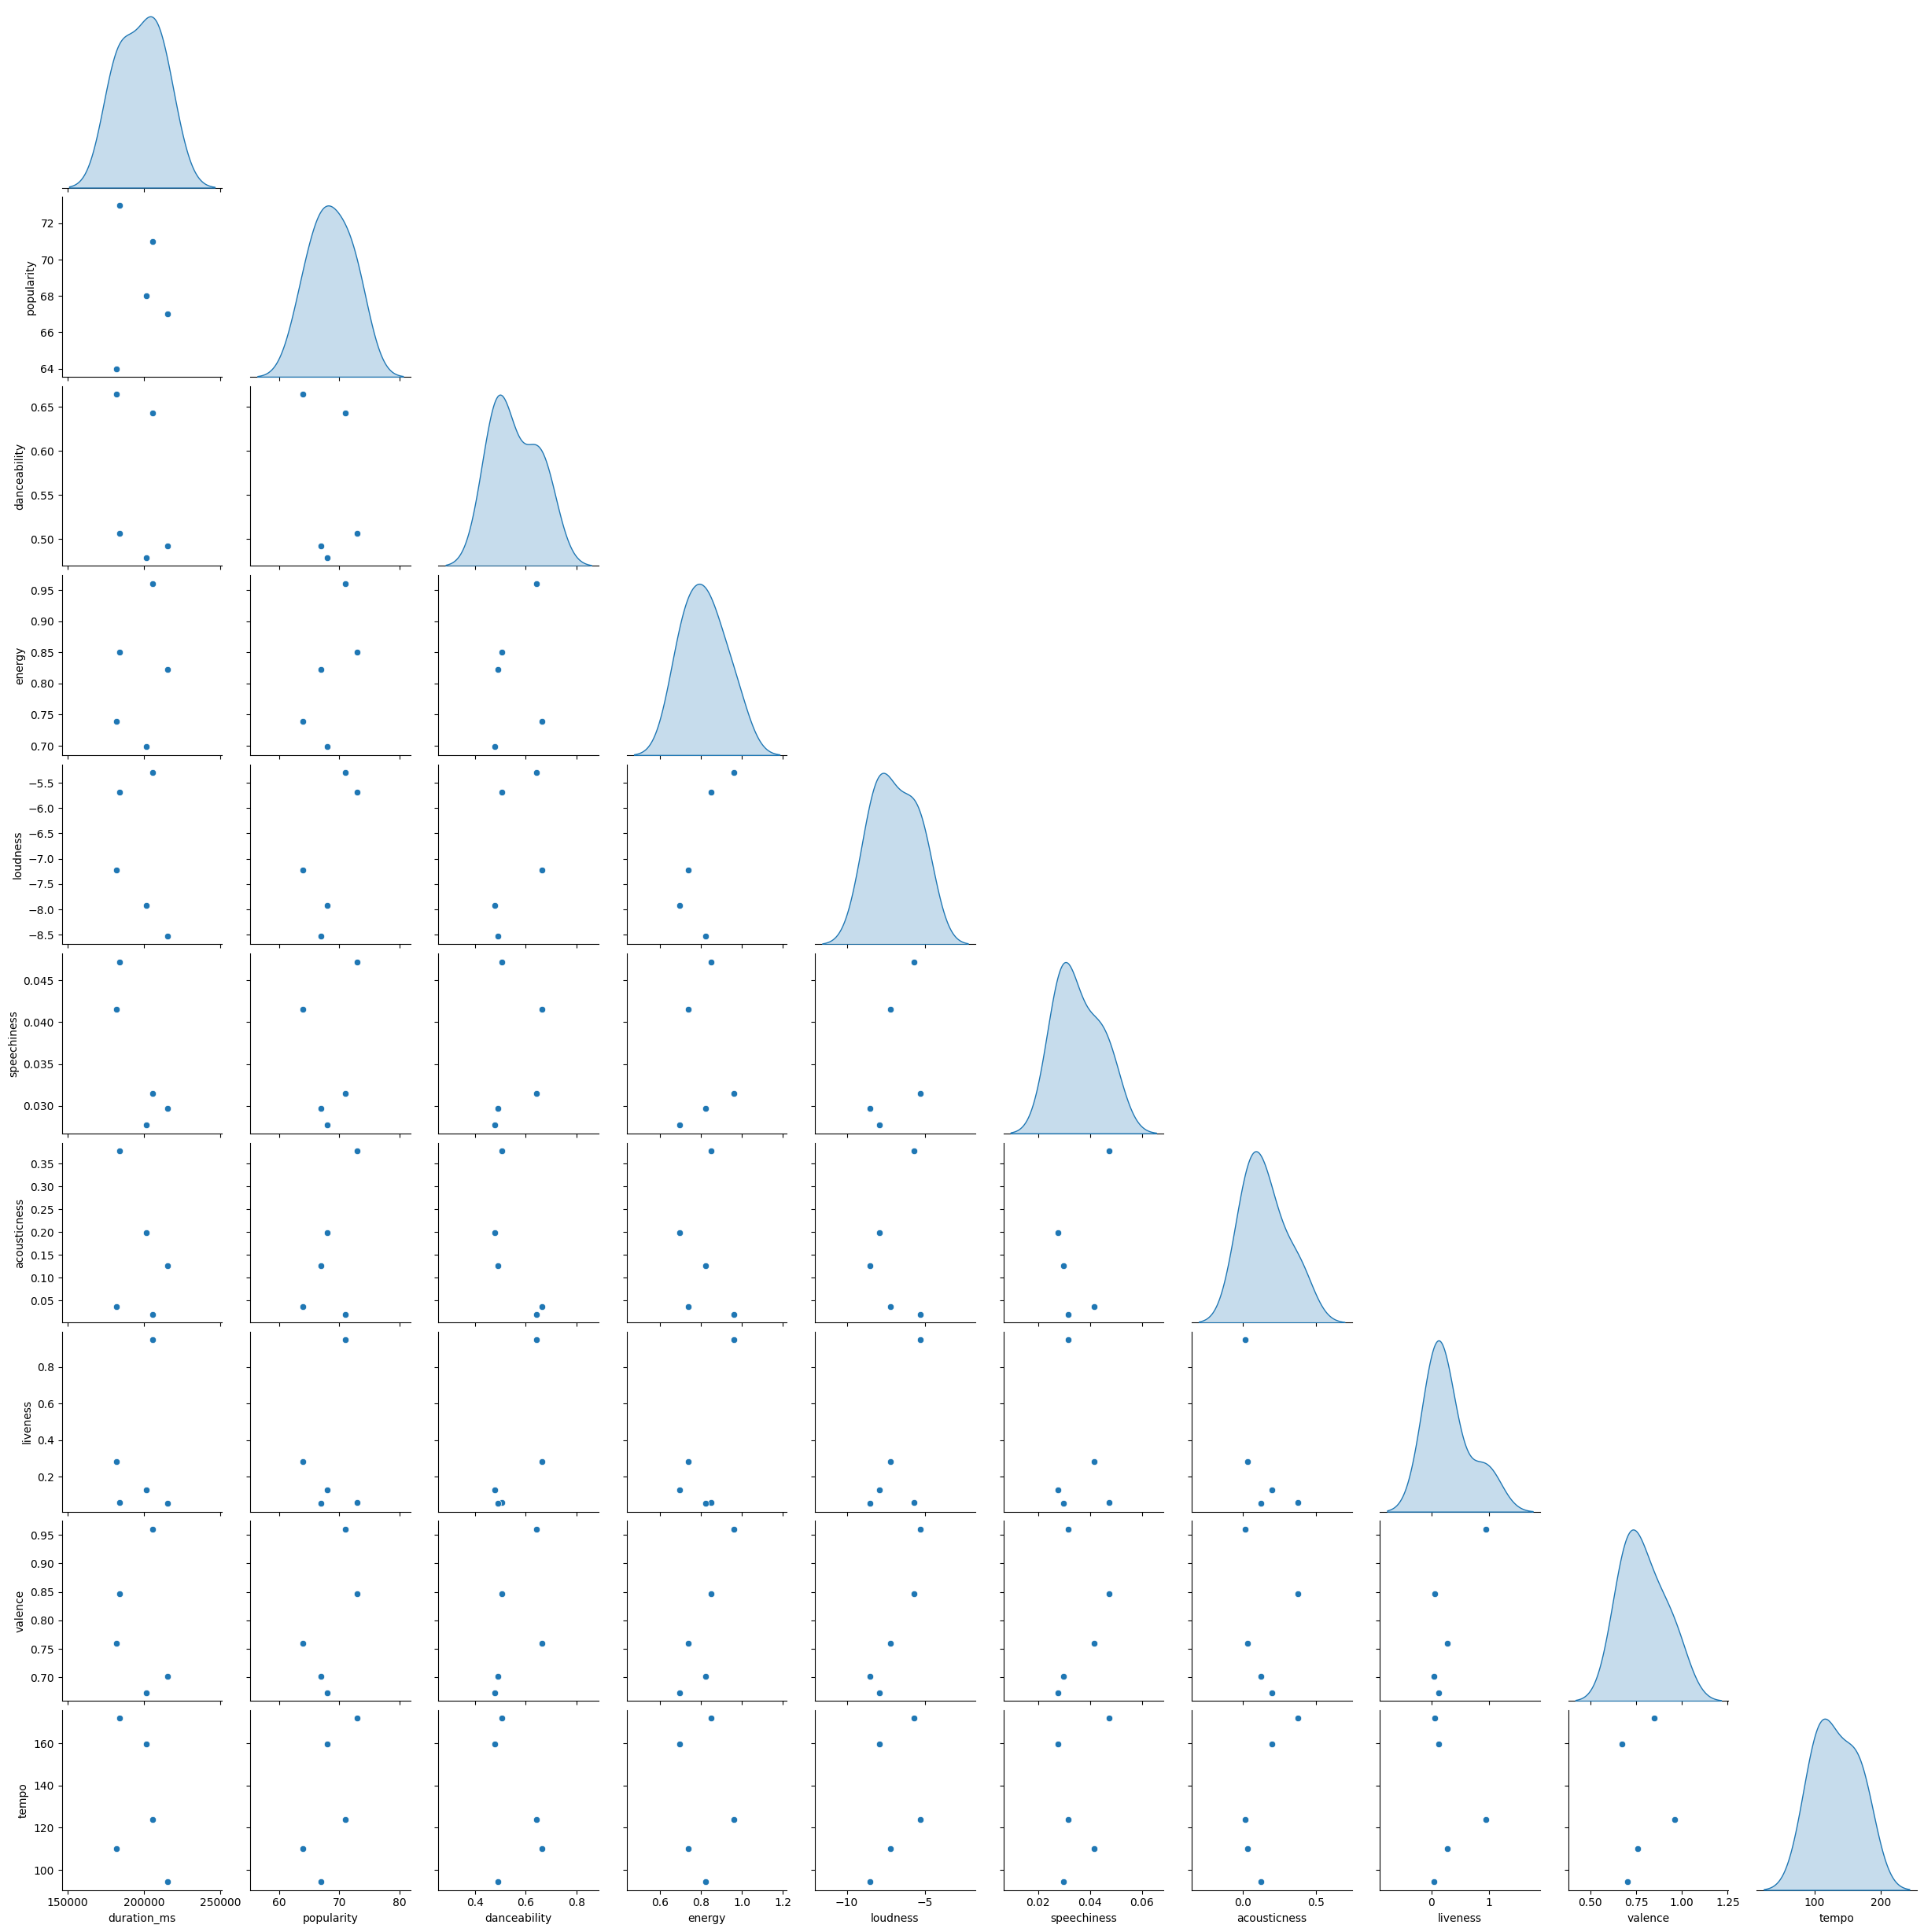

In [199]:
sns.pairplot(df_merged, diag_kind='kde', corner=True)
plt.show()